# Investigate the Data

In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from  <a href="https://fivethirtyeight.com/" target = "_blank">FiveThirtyEight</a>. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

To begin, take a look at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. After looking through some of the questions asked, take a look at FiveThirtyEight's article <a href="https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/" target = "_blank">What Do Men Think It Means To Be A Man?</a> to see their major takeaways. We're going to try to find more insights using machine learning.



In [39]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")
survey.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [40]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [41]:
len(survey)

1189

In [42]:
#How many people said they often ask a friend for professional advice?
survey['q0007_0001'].value_counts()

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64

# Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. Let's once again consider question 7. We can't cluster the data using the phrases `"Often"` or `"Rarely"`, but we can turn those phrases into numbers. For example, we could map the data in the following way: 
* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.

Note that it's important that these responses are somewhat linear. `"Often"` is at one end of the spectrum with `"Never, and not open to it"` at the other. The other values fall in sequence between the two. You could perform a similar mapping for the `"educ4"` responses (question 29), but there isn't an obvious linear progression in the `"racethn4"` responses (question 28).


In [43]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


# Plotting the Data

We now have 11 different features that we could use in our KMeans algorithm. Before we jump into clustering, let's graph some of these features on a 2D graph.

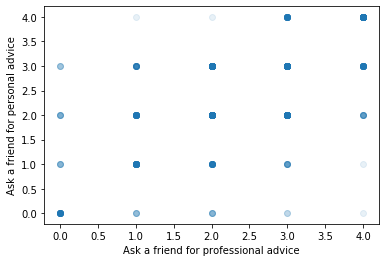

In [44]:
from matplotlib import pyplot as plt

plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

# Build the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 

Take a look at the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

We need to first drop all of the rows that contain a `NaN` value in any of the columns we're interested in.

After fitting your model, print out the model's `cluster_centers_`.



In [45]:
from sklearn.cluster import KMeans

rows_to_cluster = survey.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"])
classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"]])
classifier.cluster_centers_

array([[1.87830688, 1.84391534, 0.85185185, 1.72486772, 0.57142857,
        2.64021164, 1.97089947],
       [2.84548105, 2.81632653, 2.84110787, 2.39941691, 0.69387755,
        3.06997085, 2.90087464]])

# Separate the Cluster Members

When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluser and a masculine cluseter, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

We might be able to find out more information about these clusters by looking at the specific members of each cluster.

In [46]:
print(classifier.labels_)

cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
        
cluster_zero_indices

[1 0 1 ... 0 0 0]


[1,
 4,
 6,
 7,
 9,
 10,
 12,
 14,
 17,
 18,
 19,
 24,
 29,
 35,
 39,
 42,
 49,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 62,
 63,
 65,
 66,
 75,
 78,
 79,
 82,
 84,
 86,
 87,
 88,
 89,
 90,
 92,
 94,
 95,
 97,
 98,
 101,
 106,
 107,
 109,
 113,
 116,
 117,
 118,
 119,
 123,
 128,
 129,
 130,
 131,
 132,
 134,
 139,
 142,
 143,
 154,
 172,
 175,
 176,
 178,
 179,
 180,
 181,
 184,
 187,
 189,
 195,
 196,
 198,
 199,
 201,
 209,
 212,
 222,
 229,
 230,
 231,
 233,
 236,
 237,
 240,
 241,
 247,
 248,
 249,
 250,
 256,
 260,
 261,
 263,
 264,
 272,
 275,
 281,
 283,
 284,
 286,
 288,
 291,
 296,
 297,
 299,
 300,
 301,
 305,
 310,
 311,
 325,
 328,
 331,
 336,
 337,
 340,
 341,
 343,
 347,
 350,
 351,
 353,
 361,
 367,
 369,
 377,
 378,
 390,
 391,
 392,
 393,
 394,
 396,
 397,
 398,
 399,
 409,
 410,
 411,
 412,
 415,
 417,
 418,
 419,
 425,
 428,
 429,
 432,
 449,
 454,
 455,
 457,
 459,
 461,
 463,
 468,
 470,
 471,
 476,
 477,
 478,
 484,
 489,
 490,
 493,
 494,
 496,
 498,
 499,
 502,
 508

# Investigate the Cluster Members

Now that we have the indices for each cluster, let's look at some stats about these two clusters. 
Finally, let's look at some information about these two clusters.

In [47]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

Some college            0.314815
College or more         0.285714
Post graduate degree    0.251323
High school or less     0.145503
Name: educ4, dtype: float64
Post graduate degree    0.365889
College or more         0.330904
Some college            0.230321
High school or less     0.072886
Name: educ4, dtype: float64
